In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import nltk


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score,roc_auc_score
#-----------MODELS----------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from tpot import TPOTClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier


In [4]:
df=pd.read_csv('spam.csv', encoding_errors= 'replace')

In [5]:
df.shape

(5572, 5)

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
#1.data cleaning
#2.EDA
#3.text preprocessing
#4.model building
#5.Evaluation
#6.Improvement
#7.website
#8.Deploy

# 1.Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 colm
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an..."
2279,ham,"Sorry, I'll call later in meeting"
4800,ham,The guy at the car shop who was flirting with ...
2234,ham,What's your room number again? Wanna make sure...
1033,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka..."


In [11]:
#Renaming the cloumns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,text
5192,ham,Oh oh... Den muz change plan liao... Go back h...
3263,ham,I will send them to your email. Do you mind &...
3136,ham,You're right I have now that I think about it
4521,ham,DO U WANT 2 MEET UP 2MORRO
1553,ham,Ok how you dear. Did you call chechi


In [13]:
encode=LabelEncoder()
df['target']=encode.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#duplicate value
df.duplicated().sum()

403

In [16]:
#remove Duplicated
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()


0

In [18]:
df.shape

(5169, 2)

# 2.EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

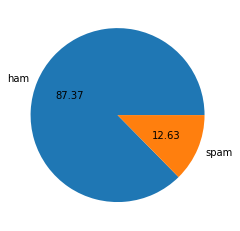

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [21]:
#Data is imbalaced

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shailesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_char']=df['text'].apply(len)

In [24]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [27]:
df['num_sentace']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df

,target,text,num_char,num_words,num_sentace
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
df.describe()

,target,num_char,num_words,num_sentace
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.454246,1.948152
std,0.332253,58.174846,13.325668,1.363792
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [30]:
df[df['target']==0][['num_char','num_words','num_sentace']].describe()

,num_char,num_words,num_sentace
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,1.799601
std,56.356802,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target']==1][['num_char','num_words','num_sentace']].describe()

,num_char,num_words,num_sentace
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


<AxesSubplot: xlabel='num_char', ylabel='Count'>

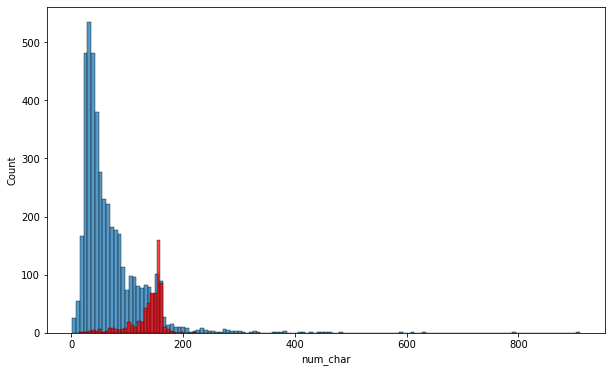

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

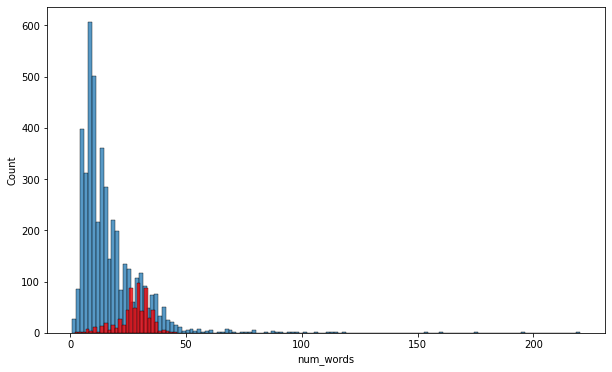

In [33]:

plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot: xlabel='num_sentace', ylabel='Count'>

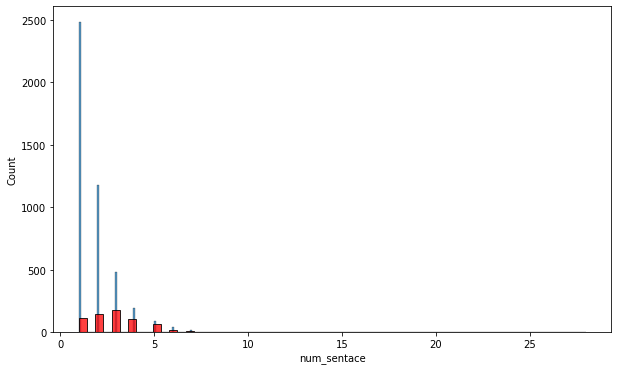

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_sentace'])
sns.histplot(df[df['target']==1]['num_sentace'],color='red')

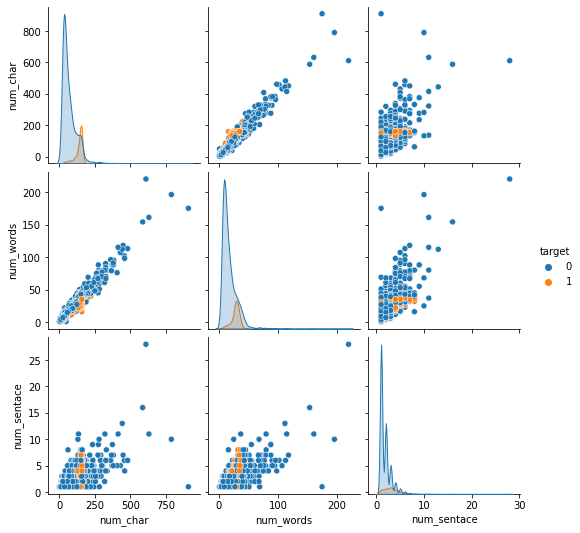

In [35]:
sns.pairplot(df,hue='target')

<AxesSubplot: >

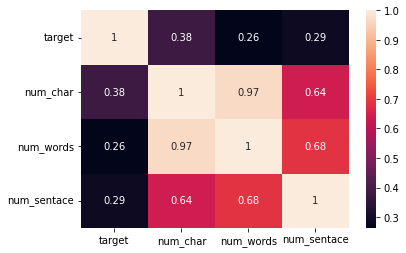

In [36]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
#1.lower case
#2.Tokenisation
#3.removespecial char
#4.Remove stop words and punctutions
#5.stemming

In [37]:
def tranform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    from nltk.corpus import stopwords
    import string
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
            y.append(ps.stem(i))
            
    return " " .join(y)
    

In [38]:
tranform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [40]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
df['text'].apply(tranform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [41]:
df['tranformed_text']=df['text'].apply(tranform_text)
df.head()


,target,text,num_char,num_words,num_sentace,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc=wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=" "))


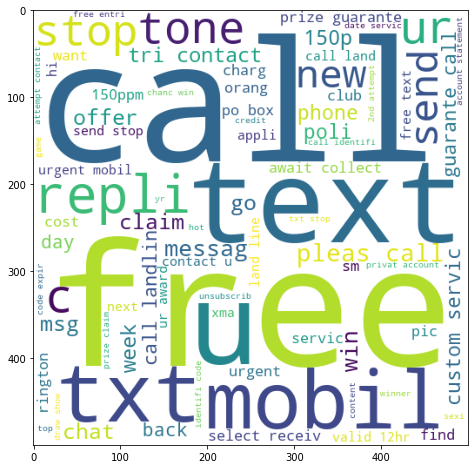

In [44]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

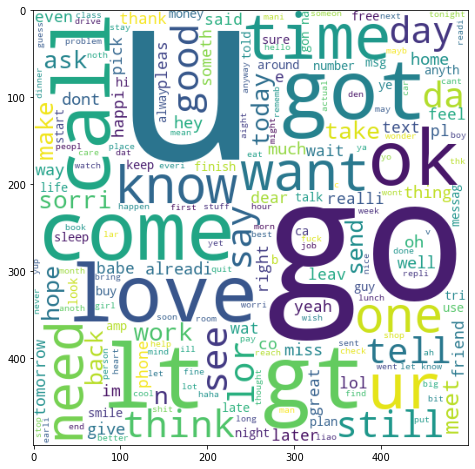

In [45]:
ham_wc=wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)


In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [47]:
len(spam_corpus)

9941

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

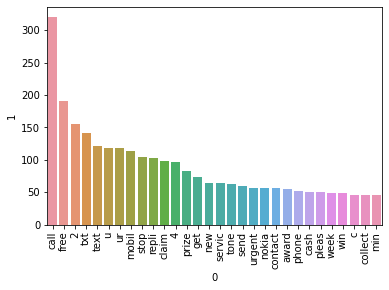

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [49]:
ham_corpus=[]
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [50]:
len(ham_corpus)

35295

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

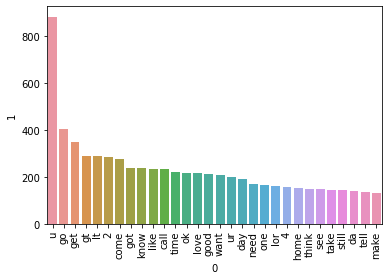

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

# Model Building

In [98]:
#text vectorisatio
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfdf=TfidfVectorizer(max_features=3000)


In [99]:
X=tfdf.fit_transform(df['tranformed_text']).toarray()

In [100]:
X.shape

(5169, 3000)

In [101]:
y=df['target'].values

In [102]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [105]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [106]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [107]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
#tdidf---->mnb models choose

In [108]:
svc=SVC(kernel='sigmoid',gamma=0.1)
knn=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [109]:
clfs={
    "svc":svc,
    'knn':knn,
    'mnb':mnb,
    'dtc':dtc,
    'lrc':lrc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gbdt':gbdt,
    'xgb':xgb
       
}

In [110]:
def train_classifer(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precison=precision_score(y_test,y_pred)
    return accuracy,precison

In [111]:
train_classifer(svc,X_train,y_train,X_test,y_test)

(0.9274661508704062, 0.9701492537313433)

In [112]:
accuracy_scrore=[]
precison_score=[]
 
for name,clf in clfs.items():
    current_accuracy,current_precison=train_classifer(clf,X_train,y_train,X_test,y_test)
    print('For',name)
    print('Accuracy',current_accuracy)
    print('Precision',current_precison)
    
    accuracy_scrore.append(current_accuracy)
    precison_score.append(current_precison)

For svc
Accuracy 0.9274661508704062
Precision 0.9701492537313433
For knn
Accuracy 0.9052224371373307
Precision 1.0
For mnb
Accuracy 0.971953578336557
Precision 1.0
For dtc
Accuracy 0.9323017408123792
Precision 0.84
For lrc
Accuracy 0.9564796905222437
Precision 0.9696969696969697
For rfc
Accuracy 0.9758220502901354
Precision 0.9829059829059829
For abc
Accuracy 0.9613152804642167
Precision 0.9454545454545454
For bc
Accuracy 0.9574468085106383
Precision 0.8615384615384616
For etc
Accuracy 0.9806576402321083
Precision 0.9758064516129032
For gbdt
Accuracy 0.9477756286266924
Precision 0.9285714285714286
For xgb
Accuracy 0.9690522243713733
Precision 0.9274193548387096


In [113]:
performance_df=pd.DataFrame({'Alorithm':clfs.keys(),'Accuracy':accuracy_scrore,'Precision':precison_score}).sort_values('Precision',ascending=False)

In [114]:
performance_df

,Alorithm,Accuracy,Precision
1,knn,0.905222,1.000000
2,mnb,0.971954,1.000000
5,rfc,0.975822,0.982906
8,etc,0.980658,0.975806
0,svc,0.927466,0.970149
4,lrc,0.956480,0.969697
6,abc,0.961315,0.945455
9,gbdt,0.947776,0.928571
10,xgb,0.969052,0.927419
7,bc,0.957447,0.861538


In [115]:
performance_df1=pd.melt(performance_df,id_vars='Alorithm')

In [116]:
performance_df1

,Alorithm,variable,value
0,knn,Accuracy,0.905222
1,mnb,Accuracy,0.971954
2,rfc,Accuracy,0.975822
3,etc,Accuracy,0.980658
4,svc,Accuracy,0.927466
5,lrc,Accuracy,0.956480
6,abc,Accuracy,0.961315
7,gbdt,Accuracy,0.947776
8,xgb,Accuracy,0.969052
9,bc,Accuracy,0.957447


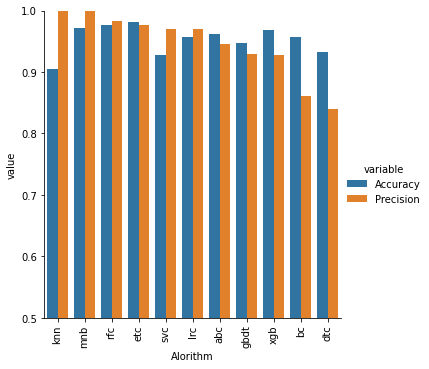

In [117]:
sns.catplot(x='Alorithm',y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
#MOdel Improve
#1.change the max_features parameter of tfidf

In [119]:
temp_df=pd.DataFrame({'Alorithm':clfs.keys(),'Accuracy_max_fea3000':accuracy_scrore,'Precision_max_fea3000':precison_score}).sort_values('Precision_max_fea3000',ascending=False)

In [121]:
performance_df.merge(temp_df,on='Alorithm')

,Alorithm,Accuracy,Precision,Accuracy_max_fea3000,Precision_max_fea3000
0,knn,0.905222,1.000000,0.905222,1.000000
1,mnb,0.971954,1.000000,0.971954,1.000000
2,rfc,0.975822,0.982906,0.975822,0.982906
3,etc,0.980658,0.975806,0.980658,0.975806
4,svc,0.927466,0.970149,0.927466,0.970149
5,lrc,0.956480,0.969697,0.956480,0.969697
6,abc,0.961315,0.945455,0.961315,0.945455
7,gbdt,0.947776,0.928571,0.947776,0.928571
8,xgb,0.969052,0.927419,0.969052,0.927419
9,bc,0.957447,0.861538,0.957447,0.861538


In [122]:
pickle.dump(tfdf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))